In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
data = pd.read_csv('temper.dat', header=None, sep=' ')
data.columns = ['time', 'temperature', 'pressure', 'kinetic', 'potential','mechanic']
display(data)

,time,temperature,pressure,kinetic,potential,mechanic
0,1.0,499.546356,191.856049,6230.187988,-552.628784,5677.559082
1,2.0,499.548492,191.854492,6230.214355,-552.652405,5677.562012
2,3.0,499.551453,191.851334,6230.251465,-552.690491,5677.561035
3,4.0,499.555328,191.847382,6230.299805,-552.745056,5677.554688
4,5.0,499.561005,191.842422,6230.370605,-552.815552,5677.555176
...,...,...,...,...,...,...
5995,5996.0,551.695801,335.216125,6880.579590,-1208.523438,5672.056152
5996,5997.0,551.701843,335.171143,6880.655273,-1208.533813,5672.121582
5997,5998.0,551.702209,335.133057,6880.659668,-1208.579590,5672.080078
5998,5999.0,551.695984,335.119873,6880.582031,-1208.505737,5672.076172


In [2]:
t = data.iloc[:,0]
temp = data.iloc[:,1]
pr  = data.iloc[:,2]
kin = data.iloc[:,3]
pot = data.iloc[:,4]
mec = data.iloc[:,5]

#means after equilibration zone
data_mean = data.loc[2500:len(t)]
display(data_mean)
t2 = data_mean.iloc[:,0]

,time,temperature,pressure,kinetic,potential,mechanic
2500,2501.0,546.558289,332.811310,6816.505859,-1143.243530,5673.262207
2501,2502.0,546.330627,333.661957,6813.666504,-1140.431030,5673.235352
2502,2503.0,546.108643,334.499054,6810.897949,-1137.640747,5673.257324
2503,2504.0,545.894287,335.310730,6808.224609,-1134.944702,5673.279785
2504,2505.0,545.690247,336.074036,6805.680176,-1132.507568,5673.172852
...,...,...,...,...,...,...
5995,5996.0,551.695801,335.216125,6880.579590,-1208.523438,5672.056152
5996,5997.0,551.701843,335.171143,6880.655273,-1208.533813,5672.121582
5997,5998.0,551.702209,335.133057,6880.659668,-1208.579590,5672.080078
5998,5999.0,551.695984,335.119873,6880.582031,-1208.505737,5672.076172


In [5]:
#Statistics for:
#Temperature
temp_mean = np.mean(data_mean.iloc[:,1])
temp_sd   = np.std(data_mean.iloc[:,1])
temp_conf_int = st.t.interval(confidence=0.95, df=len(t2)-1, loc=temp_mean)

#Pressure
pr_mean = np.mean(data_mean.iloc[:,2])
pr_sd   = np.std(data_mean.iloc[:,2])
pr_conf_int = st.t.interval(confidence=0.95, df=len(t2)-1, loc=pr_mean)

#Kinetic
kin_mean = np.mean(data_mean.iloc[:,3])
kin_sd   = np.std(data_mean.iloc[:,3])
kin_conf_int = st.t.interval(confidence=0.95, df=len(t2)-1, loc=kin_mean)

#Potential
pot_mean = np.mean(data_mean.iloc[:,4])
pot_sd   = np.std(data_mean.iloc[:,4])
pot_conf_int = st.t.interval(confidence=0.95, df=len(t2)-1, loc=pot_mean)

#Mechanical
mec_mean = np.mean(data_mean.iloc[:,5])
mec_sd   = np.std(data_mean.iloc[:,5])
mec_conf_int = st.t.interval(confidence=0.95, df=len(t2)-1, loc=mec_mean)

#Create DataFrame
dataF = {'Variable': ['Temperature (K)', 'Pressure (bar)', 'Kinetic energy (J)', 'Potential energy (J)', 'Mechanical energy (J)'], 
      'Mean': [temp_mean, pr_mean, kin_mean, pot_mean, mec_mean],
      'Std. deviation': [temp_sd, pr_sd, kin_sd, pot_sd, mec_sd],
      'Inf. Conf. Interval (95%)':[temp_conf_int[0], pr_conf_int[0], kin_conf_int[0], pot_conf_int[0], mec_conf_int[0]],
      'Sup. Conf. Interval (95%)':[temp_conf_int[1], pr_conf_int[1], kin_conf_int[1], pot_conf_int[1], mec_conf_int[1]]}

dF = pd.DataFrame(data=dataF)
dF.round(0)

,Variable,Mean,Std. deviation,Inf. Conf. Interval (95%),Sup. Conf. Interval (95%)
0,Temperature (K),551.0,4.0,549.0,553.0
1,Pressure (bar),327.0,15.0,325.0,329.0
2,Kinetic energy (J),6875.0,45.0,6873.0,6877.0
3,Potential energy (J),-1203.0,45.0,-1205.0,-1201.0
4,Mechanical energy (J),5672.0,1.0,5670.0,5674.0


Text(0, 0.5, 'Kinetic energy (J)')

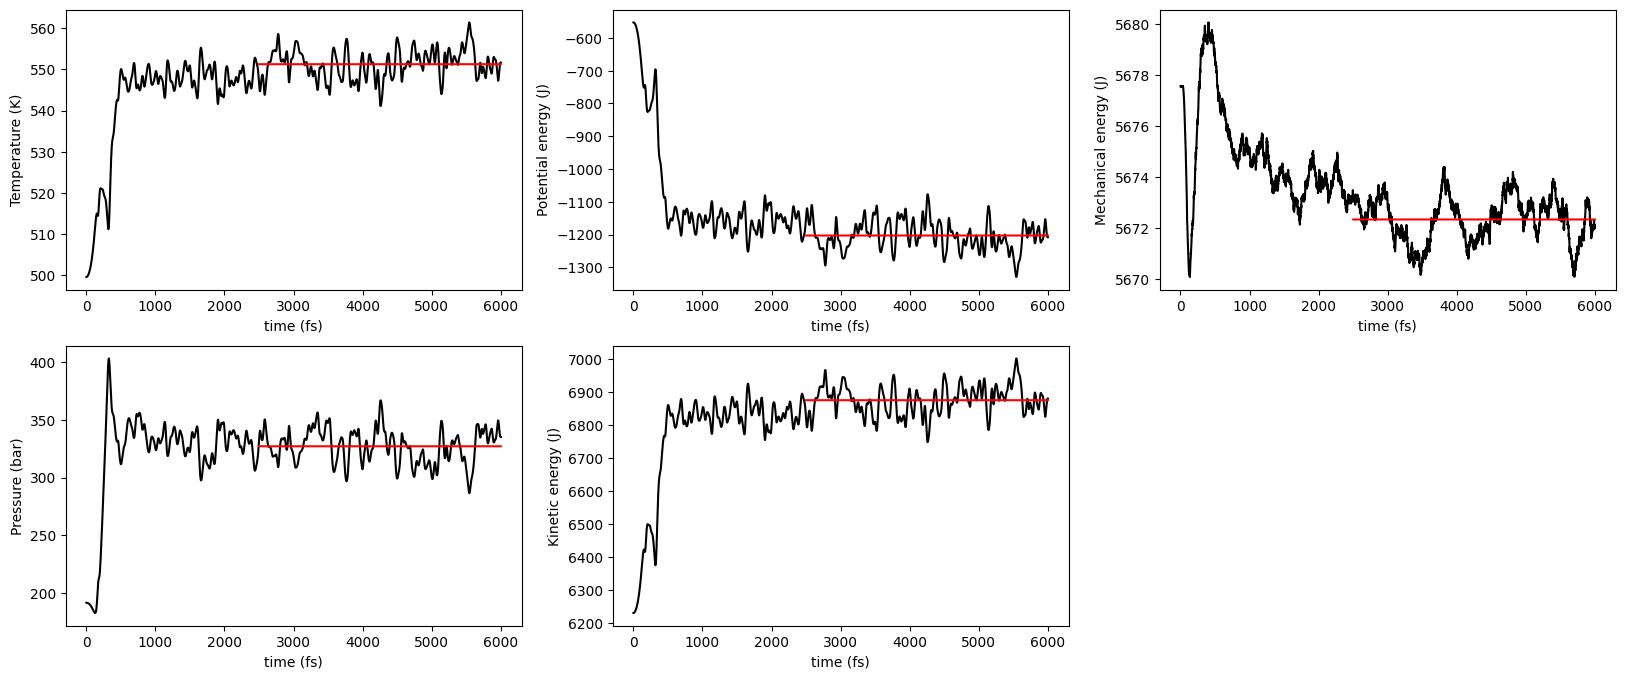

In [4]:
f = plt.figure(0, figsize=(20,8))
f.add_subplot(2,3,1)
plt.plot(t,temp,'-', color ='black')
plt.plot(t2,temp_mean*np.ones(len(t2)),'-',color = 'red')
plt.xlabel('time (fs)')
plt.ylabel('Temperature (K)')

f.add_subplot(2,3,2)
plt.plot(t,pot,'-', color ='black')
plt.plot(t2,pot_mean*np.ones(len(t2)),'-',color = 'red')
plt.xlabel('time (fs)')
plt.ylabel('Potential energy (J)')

f.add_subplot(2,3,3)
plt.plot(t,mec,'-', color ='black')
plt.plot(t2,mec_mean*np.ones(len(t2)),'-',color = 'red')
plt.xlabel('time (fs)')
plt.ylabel('Mechanical energy (J)')

f.add_subplot(2,3,4)
plt.plot(t,pr,'-', color ='black')
plt.plot(t2,pr_mean*np.ones(len(t2)),'-',color = 'red')
plt.xlabel('time (fs)')
plt.ylabel('Pressure (bar)')

f.add_subplot(2,3,5)
plt.plot(t,kin,'-', color ='black')
plt.plot(t2,kin_mean*np.ones(len(t2)),'-',color = 'red')
plt.xlabel('time (fs)')
plt.ylabel('Kinetic energy (J)')